# Constant-Coefficient Homogeneus Second Order ODE - Theory

An constant-coefficient homogeneus linear second-order ODE has the following format:
$$\frac{d^2y}{dx^2}+p\frac{dy}{dx}+qy(x) = 0$$
where $p,q \in \mathbb{R}$.

## The Equation's Solution
The general solution $y(x)$ for this type of equation is a linear combination of two fundamental solutions $y_1(x)$ and $y_1(x)$:

$$y(x) = c_1y_1(x) + c_2y_2(x)$$

where $c_1$ and $c_2$ are constants that must be found by solving de initial value problem.

In general, for this type of ODE, the fundamental solutions have the following format:
$$y(x) = e^{\lambda x}$$
where $\lambda_n \in \mathbb{C}$.

### Characteristic Equation

To find the $\lambda$ for each of the two fundamental solutions, it is necessary to solve the following characteristic quadratic equation:

$$\lambda^2 e^{\lambda x} + p \lambda e^{\lambda x} + q e^{\lambda x} = 0$$

This equation is obtained by replacing $y(x)$ with the assumed solution $e^{\lambda x}$, and consequently its first derivative $y'(x)$ with $\lambda e^x$ and its second derivative $y''(x)$ with $\lambda^2 e^x$.

It is equivalent to

$$e^{\lambda x} (\lambda^2 + p \lambda + q ) = 0$$

Is fact that does not exists a $t \in \mathbb{C}$ which satisfacts $e^t = 0$, therefore:

$$\lambda^2 + p \lambda + q = 0$$

Applying the quadratic formula, we have $\lambda_1 = \frac{-p + \sqrt{\Delta}}{2}$ and $\lambda_2 = \frac{-p - \sqrt{\Delta}}{2}$, where $\Delta = p^2 - 4q$.

### Fundamental and General Solutions
The fundamental solutions $y_1(x)$ and $y_2(x)$ need to be linearly independent. This linear independence can be verified by the Wronskian. The characteristc equation can have two real roots, one real root or two complex roots, and there are a pair of fundamentally linearly independent solutions for each of these cases.

#### Case $\Delta > 0$

In this case, $\lambda_1, \lambda_2 \in \mathbb{R}$ and $\lambda_1 \neq \lambda_2$.

The fundamental solutions are $y_1(x)=e^{\lambda_1 x}$ and, $y_2(x)=e^{\lambda_2 x}$.

The general solution is:

$$y(x) = c_1 e^{\lambda_1 x} + c_2 e^{\lambda_2 x}$$

where $c_1, c_2 \in \mathbb{R}$.

#### Case $\Delta = 0$

In this case, $\lambda = \lambda_1 = \lambda_2$ and $\lambda \in \mathbb{R}$.

The fundamental solutions are $y_1(x)= e^{\lambda x}$ and $y_2(x)= x e^{\lambda x}$.

The general solution is:

$$y(x) = c_1 e^{\lambda x} + c_2 x e^{\lambda x}$$

where $c_1, c_2 \in \mathbb{R}$.

#### Case $\Delta < 0$

In this case, $\lambda_1, \lambda_2 \in \mathbb{C}$. These roots are $\lambda_1 = \alpha + \beta i$ and $\lambda_2 = \alpha - \beta i$.

The fundamental solutions are:

$$y_1(x) = e^{\lambda_1 x} = e^{x(\alpha + \beta i)} = e^{x \alpha } e^{x \beta i}$$

and

$$y_2(x) = e^{\lambda_2 x} = e^{x(\alpha - \beta i)} = e^{x \alpha } e^{-x \beta i}$$

By applying the Euler's indentity ($e^{i\theta} = \cos\theta + i\sin\theta$), we find out:

$$y_1(x) = e^{x \alpha } e^{x \beta i} = e^{x \alpha } [\cos(\beta x) + i\sin(\beta x)]$$

and

$$y_2(x) = e^{x \alpha } e^{-x \beta i} = e^{x \alpha } [\cos(\beta x) - i\sin(\beta x)] $$

The general solution is therefore:

$$y(x) = c_1 e^{\lambda_1 x} + c_2 e^{\lambda_2 x} = c_1 e^{x \alpha } [\cos(\beta x) + i\sin(\beta x)] + c_2 e^{x \alpha } [\cos(\beta x) - i\sin(\beta x)]  = e^{x \alpha } [\cos(\beta x)(c_1 + c_2) + i\sin(\beta x)(c_1 - c_2)] $$

where $c_1, c_2 \in \mathbb{R}$. 

Considering $k_1 = (c_1 + c_2)$ and $k_2 = i(c_1 - c_2)$, we have:

$$y(x) = e^{x \alpha } [k_1\cos(\beta x) + k_2\sin(\beta x)]$$

# Practice with Python

## Solving the Const-Coeff Homogeneus Second-Order ODE
In this practice, we will use the algebraic manipulation of the **SymPy** symbolic math package, numeric features of the **NumPy** package and the plotting from the **MatPlotLib** package. For first, we will import these packages.

In [1]:
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

Now, we gonna define a function to give the roots of the characteristic equation.

In [2]:
def get_characteristic_eq_roots(p, q):
    l = Symbol('l') #Defines the unknown l

    c_eq = Eq(l**2 + p*l + q, 0) #Gets SymPy's characteristic equation

    c_eq_roots = solve(c_eq, l) #Gets the l roots of the c_eq 
    
    return c_eq_roots

This function returns a list of symbolic roots, that can be two real roots, a single real root or two complex roots. Look that at the following example:

In [3]:
print('Real roots (p=-3, q=2): ', get_characteristic_eq_roots(-3, 2))
print('Complex roots (p=1, q=1): ', get_characteristic_eq_roots(1, 1))
print('Single root (p=2, q=1): ', get_characteristic_eq_roots(2, 1))

Real roots (p=-3, q=2):  [1, 2]
Complex roots (p=1, q=1):  [-1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]
Single root (p=2, q=1):  [-1]


Now, we gonna define a function to give the fundamental solutions of the ODE.

In [4]:
def get_ODE_fundamental_solutions(x, p, q):
    c_eq_roots = get_characteristic_eq_roots(p, q)
    
    if len(c_eq_roots) == 1:# Single real root
        l = c_eq_roots[0] #Root lambda
        
        y1 = exp(l*x) #fundamental solution y1(x)
        y2 = x*exp(l*x) #fundamental solution y2(x)
        
        return [y1, y2]
    
    elif len(c_eq_roots) == 2: #Two roots
        if c_eq_roots[0].is_real == True and c_eq_roots[1].is_real == True: # Real roots
            l1 = c_eq_roots[1] #Root lambda1
            l2 = c_eq_roots[0] #Root lambda2
            
            y1 = exp(l1*x) #fundamental solution y1(x)
            y2 = exp(l2*x) #fundamental solution y2(x)
            
            return [y1, y2]
        
        elif c_eq_roots[0].is_real == False and c_eq_roots[1].is_real == False: # Complex roots
            l1 = c_eq_roots[1] #Root lambda1
            l2 = c_eq_roots[0] #Root lambda2
            
            alpha = re(l1) #Real part of the roots
            beta = abs(im(l1)) #Absolute imaginary part of the roots
            
            y1 = exp(alpha*x)*( cos(beta*x) + I*sin(beta*x)) #fundamental solution y1(x)
            y2 = exp(alpha*x)*( cos(beta*x) - I*sin(beta*x)) #fundamental solution y2(x)
            
            return [y1, y2]
        
        else: #Error
            raise Exception('Unexpected answer from the get_characteristic_eq_roots function.')
        
    else: #Error
        raise Exception('Unexpected answer from the get_characteristic_eq_roots function.')

This function returns a list of symbolic fundamental solutions. Look that at the following examples:

In [5]:
x = Symbol('x')

print('p=-3, q=2: ', get_ODE_fundamental_solutions(x, -3, 2))
print('p=1, q=1: ', get_ODE_fundamental_solutions(x, 1, 1))
print('p=2, q=1: ', get_ODE_fundamental_solutions(x, 2, 1))

p=-3, q=2:  [exp(2*x), exp(x)]
p=1, q=1:  [(I*sin(sqrt(3)*x/2) + cos(sqrt(3)*x/2))*exp(-x/2), (-I*sin(sqrt(3)*x/2) + cos(sqrt(3)*x/2))*exp(-x/2)]
p=2, q=1:  [exp(-x), x*exp(-x)]


Now, we gonna define a function to give the symbolic general solution.

In [6]:
def get_ODE_solution(x, p, q, c1, c2):
    fundamental_solutions = get_ODE_fundamental_solutions(x, p, q)
    
    y1 = fundamental_solutions[0] #Fundamental solution y1(x)
    y2 = fundamental_solutions[1] #Fundamental solution y2(x)
    
    y = c1*y1 + c2*y2 #General solution y(x)
    
    return y

Testing...

In [7]:
x, c1, c2 = Symbol('x'), Symbol('c1'), Symbol('c2')

print('p=-3, q=2: ', get_ODE_solution(x, -3, 2, c1, c2))
print('p=1, q=1: ', get_ODE_solution(x, 1, 1, c1, c2))
print('p=2, q=1: ', get_ODE_solution(x, 2, 1, c1, c2))

p=-3, q=2:  c1*exp(2*x) + c2*exp(x)
p=1, q=1:  c1*(I*sin(sqrt(3)*x/2) + cos(sqrt(3)*x/2))*exp(-x/2) + c2*(-I*sin(sqrt(3)*x/2) + cos(sqrt(3)*x/2))*exp(-x/2)
p=2, q=1:  c1*exp(-x) + c2*x*exp(-x)


Finally, we will define a function to give the $y(x)$ values for any $x$ input in the ODE solution.

In [8]:
def get_ODE_function(p, q, c1, c2):
    x = Symbol('x')
    
    symbolic_solution = get_ODE_solution(x, p, q, c1, c2)
    
    y_function = lambdify(x, symbolic_solution)
    
    return y_function

## Plotting $y(x)$
Plotting $y(x)$ from $y''(x) + y'(x) + 10y(x) = 0$ with $c_1 = c_2 = 1$: 

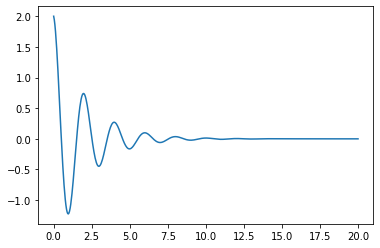

In [9]:
p, q, c1, c2 = (1, 10, 1, 1)
y = get_ODE_function(p, q, c1, c2) #y(x) function
x = np.linspace(0,20,500) #500 dots in [0, 20]
plt.plot(x,y(x).real) #Plot the real part of y(x)
plt.show()

Plotting $y(x)$ from $y''(x) + 10y'(x) + 10y(x) = 0$ with $c_1 = c_2 = 1$:

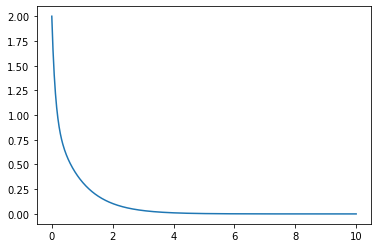

In [10]:
p, q, c1, c2 = (10, 10, 1, 1)
y = get_ODE_function(p, q, c1, c2) #y(x) function
x = np.linspace(0,10,500) #500 dots in [0, 10]
plt.plot(x,y(x).real) #Plot the real part of y(x)
plt.show()

Plotting $y(x)$ from $y''(x) + \frac{y'(x)}{2} + y(x) = 0$ with $c_1=c_2=1$:

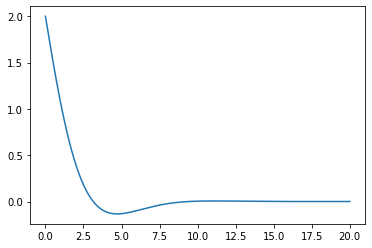

In [11]:
p, q, c1, c2 = (1, 0.5, 1, 1)
y = get_ODE_function(p, q, c1, c2) #y(x) function
x = np.linspace(0,20,500) #500 dots in [0, 20]
plt.plot(x,y(x).real) #Plot the real part of y(x)
plt.show()